diplomado_cm_ia# Task

Ejecuta el paso de seleccion de caratcerísticas utilizando alguno de los métodos estudiado en clases. Identifica el subconjunto óptimo de rasgos y visualiza la importancia.

## Utiliza uno de dos conjuntos disponibles:

1.   app_out.csv_best1482.csv -> problema de clasificación
2.   ACE_coop_ejec1.csv_2100.csv -> problema de regresión

## Para cargar los datos

```python
  from google.colab import drive
  # Mount Google Drive
  drive.mount('/content/drive')

  # Load the dataset
  file_path = '/content/drive/MyDrive/diplomado_cm_ia/seleccion/app_out.csv_best1482.csv'
  df = pd.read_csv(file_path)
```

In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/diplomado_cm_ia/seleccion/app_out.csv_best1482.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify loading and identify columns
print("Dataset loaded successfully. Shape:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully. Shape: (198, 96)


,Class,MIC_GOWAWA[0.6;1;S-OWA;1.0;0.0;2;W-OWA;0.9;1.0]_H_cdch,TS[3]_GOWAWA[0.0;1;NONE;0.0;0.0;0;S-OWA;0.0;1.0]_T_cdch,TS[1]_SIC_T_scm,GV[4]_CHOQUET[A;-0.75;AO1;0.9]_H_pah,GV[1]_HM_H_pah,TS[3]_CHOQUET[A;-0.75;AO2;0.0]_N_scm,TS[4]_V_U_z3,TS[1]_CHOQUET[D;-0.75;AO1;1.0]_C_pie,GV[2]_CHOQUET[A;-0.75;AO1;0.3]_H_eps,...,GV[1]_GOWAWA[0.1;2;ES2-OWA;0.9;0.0;2;W-OWA;0.2;0.3]_T_isa,AC[7]_P3_U_ptt,AC[2]_CHOQUET[A;-0.25;AO1;0.8]_H_pah,GOWAWA[0.0;1;NONE;0.0;0.0;2;W-OWA;0.5;0.6]_N_ptt,AC[1]_AM_T_kh,SIC_F_hwhh,GV[3]_P2_T_eps,TS[3]_Q1_T_eps,CHOQUET[A;-0.5;AO2;0.0]_N_isa,GOWAWA[0.8;1;AO2-OWA;1.0;0.0;1;ES2-OWA;0.9;0.0]_F_mw
0,APP,0.403175,2.0,0.869991,0.407078,1.644326,0.000000,0.499647,18.744790,103089.935211,...,12562.902768,1.470430,1.603833,0.0,0.136364,0.057039,65939.379687,-917.510,0.000000,60.209770
1,APP,0.496432,2.0,0.931745,0.308025,0.000000,0.000000,10.638748,15.945095,95135.329650,...,12515.945958,1.312000,1.365300,0.0,0.066667,0.000000,59085.282068,-863.585,0.000000,36.612383
2,APP,0.497959,1.0,0.736937,0.396571,1.681082,9.083363,0.288439,14.365416,103601.118580,...,3595.431810,2.181200,1.612373,0.0,0.000000,0.187538,66740.268234,-908.460,1.592966,80.033651
3,APP,0.499336,1.0,0.906529,0.397736,1.633524,10.817273,0.479576,16.050571,104069.753084,...,3512.199714,1.290100,1.652750,0.0,0.037037,0.123077,69013.152574,-956.680,1.637288,75.783713
4,APP,0.507142,1.0,0.879855,0.384755,1.628397,7.132890,1.200012,14.814251,102534.383905,...,11939.379070,1.931117,1.634990,0.0,0.030303,0.137402,64020.755790,-908.460,1.167638,73.185283


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Separate target (y) and features (X)
X = df.drop(columns=['Class'])
y = df['Class']

# 2. Encode categorical labels in 'Class'
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Classes encoded: {dict(zip(le.classes_, le.transform(le.classes_)))}")


X_train = X
y_train = y_encoded

print(f"Preprocessing complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Training label shape: {y_train.shape}")

Classes encoded: {'APP': np.int64(0), 'nonAPP': np.int64(1)}
Preprocessing complete.
Training set shape: (198, 95)
Training label shape: (198,)


## Selección de Características (SFS)

### Subtask:
Configurar y ejecutar el Sequential Feature Selector (SFS) de scikit-learn utilizando un RandomForestClassifier como estimador para encontrar el subconjunto óptimo de variables.


In [6]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate the estimator
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Initialize Sequential Feature Selector (SFS)
# We'll select 10 features using forward selection
sfs = SequentialFeatureSelector(rf, n_features_to_select=10, direction='forward', cv=5, n_jobs=-1)

# 3. Fit SFS to training data
print("Starting Sequential Feature Selection (this may take a moment)...")
sfs.fit(X_train, y_train)

# 4. Identify selected features
selected_features = X_train.columns[sfs.get_support()]
print(f"Selected features: {list(selected_features)}")

# 5. Transform the datasets
X_train_sfs = sfs.transform(X_train)


# Convert transformed arrays back to DataFrames for easier handling later
X_train_sfs = pd.DataFrame(X_train_sfs, columns=selected_features, index=X_train.index)


print(f"Transformation complete. New shape: {X_train_sfs.shape}")

Starting Sequential Feature Selection (this may take a moment)...
Selected features: ['GV[4]_CHOQUET[A;-0.75;AO1;0.9]_H_pah', 'GV[1]_HM_H_pah', 'TS[3]_CHOQUET[A;-0.75;AO2;0.0]_N_scm', 'ES_SD_H_z2', 'TS[3]_I50_F_mw', 'AC[2]_CHOQUET[A;-0.5;AO1;0.2]_U_pbs', 'TS[4]_GOWAWA[0.5;1;AO2-OWA;1.0;0.0;1;ES2-OWA;0.9;0.0]_F_cch', 'ES_Q2_A_khh', 'TS[3]_GOWAWA[0.0;1;NONE;0.0;0.0;2;W-OWA;0.5;0.6]_N_gcp1', 'AC[2]_GOWAWA[0.2;2;S-OWA;0.6;0.0;2;S-OWA;0.8;0.1]_B_pie']
Transformation complete. New shape: (198, 10)


## Visualización y Evaluación

### Subtask:
Generar un gráfico de barras con la importancia de los rasgos seleccionados y mostrar el rendimiento (accuracy) del modelo con el subconjunto final.


/tmp/ipython-input-880189966.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


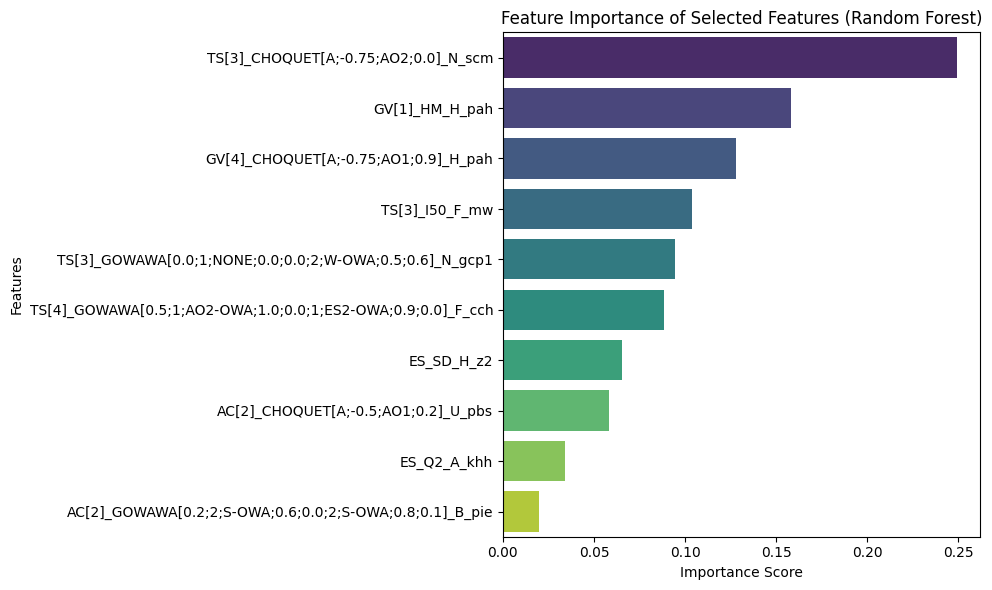

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# 1. Retrain the model using only selected features
rf_final = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_final.fit(X_train_sfs, y_train)

# 2. Get feature importances
importances = rf_final.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance of Selected Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

